In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation = "relu", padding = "same", input_shape = (28, 28, 1)),
        layers.MaxPooling2D(pool_size = (2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation = "softmax"),
    ]
)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Scale the images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

#Add a channel dimension to the images
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

#Split the trainingset into training and validation sets
x_train, x_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

In [4]:
datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range  = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    horizontal_flip = False,
    vertical_flip = False,
    )

In [6]:
#Without data augmentation
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])
history1 = model.fit(x_train, y_train, batch_size = 32, epochs = 5, validation_data = (x_test, y_test))

#with data augmentation
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])
history2 = model.fit(datagen.flow(x_train, y_train, batch_size = 32), epochs = 5, validation_data = (x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2397 - accuracy: 0.9309 - val_loss: 0.1023 - val_accuracy: 0.9692
Epoch 2/5
1563/1563 [==============================] - 15s 10ms/step - loss: 0.0895 - accuracy: 0.9734 - val_loss: 0.0795 - val_accuracy: 0.9767
Epoch 3/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0673 - accuracy: 0.9792 - val_loss: 0.0666 - val_accuracy: 0.9778
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0550 - accuracy: 0.9835 - val_loss: 0.0602 - val_accuracy: 0.9798
Epoch 5/5
1563/1563 [==============================] - 16s 11ms/step - loss: 0.0460 - accuracy: 0.9864 - val_loss: 0.0591 - val_accuracy: 0.9810
Epoch 1/5
1563/1563 [==============================] - 29s 19ms/step - loss: 0.3172 - accuracy: 0.9050 - val_loss: 0.0990 - val_accuracy: 0.9717
Epoch 2/5
1563/1563 [==============================] - 23s 15ms/step - loss: 0.2167 - accuracy: 0.9342 - val_loss: 0.1406 - val_acc

In [7]:
#Without data augmentation 
model.evaluate(x_test, y_test)

#With data augmentation
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1186 - accuracy: 0.9634


[0.11859195679426193, 0.9634000062942505]

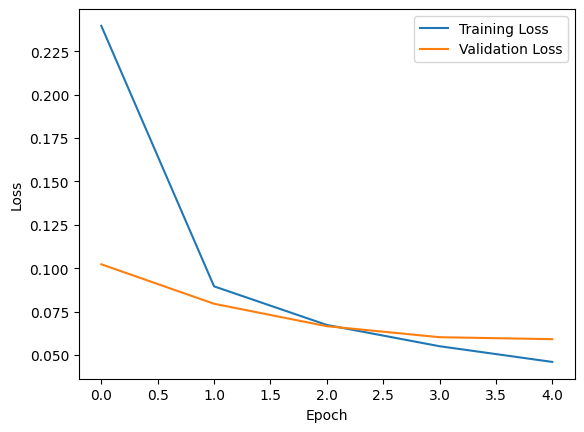

In [9]:
import matplotlib.pyplot as plt

#Plot the training and validation loss
plt.plot(history1.history['loss'], label = 'Training Loss')
plt.plot(history1.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

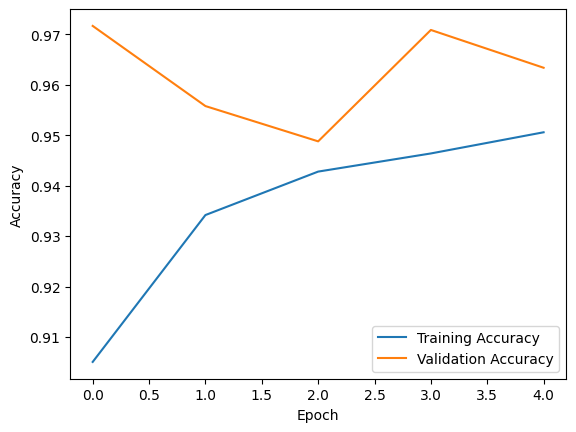

In [10]:
plt.plot(history2.history['accuracy'], label = 'Training Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()